# Image augmentation 
This Notebook is used to generate more training data by augmentation of the original images. For the augmentation horizontal and vertical flips und random rotation (between -90 and 90 degree) are used. 

In [5]:
import numpy as np
import cv2
from PIL import Image
import glob
from tqdm import tqdm
import os
import random

In [19]:
def rotate_img(path, save_path):
    # source: https://mail.python.org/pipermail/image-sig/2007-January/004274.html
    
    # open the pic and give it an alpha channel so it's transparent
    im1 = Image.open(path).convert('RGBA')
    # rotate it and expand it's canvas so the corners don't get cut off:
    random_angle = random.randint(-90, 90)
    im2 = im1.rotate(random_angle, expand = 1)
    return im2
    try: 
        im2.save(save_path)
    except: 
        im2.save(save_path,"PNG")

In [20]:
def flip_vertical(path, save_path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_flip = cv2.flip(img, 0)
    img_flip = Image.fromarray(img_flip)
    return img_flip

    img_flip.save(save_path)

In [21]:
def flip_horizontal(path, save_path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_flip = cv2.flip(img, 1)
    img_flip = Image.fromarray(img_flip)
    return img_flip

    img_flip.save(save_path)

In [11]:
list_paths = ['/home/jpawick/Medienverarbeitung/done/*/*', 
              '/home/swehrhahn/Medienverarbeitung/*/*', 
              '/home/dschulte/Medienverarbeitung/*/*']

In [13]:
# iterate over each image and modify images to increase number for train
target_path = './augmented_images/'

for path in tqdm(list_paths, total=len(list_paths)):
    for path_img in glob.glob(path):  
        try:
            # original image
            img = Image.open(path_img) 
            img.save(target_path + path_img.replace('done/', '').split('Medienverarbeitung/')[1].replace('/', '_'))

            # flip horizontal
            flip_horizontal(path_img, target_path + 'flip_h_'+ path_img.replace('done/', '').split('Medienverarbeitung/')[1].replace('/', '_'))
            # flip vertical
            flip_vertical(path_img, target_path + 'flip_v_'+ path_img.replace('done/', '').split('Medienverarbeitung/')[1].replace('/', '_'))      
            # rotation
            rotate_img(path_img, target_path + 'rotated_1'+ path_img.replace('done/', '').split('Medienverarbeitung/')[1].replace('/', '_'))
            rotate_img(path_img, target_path + 'rotated_2'+ path_img.replace('done/', '').split('Medienverarbeitung/')[1].replace('/', '_'))
        except Exception as e: 
            print(path_img)
            print(e)
            continue



  0%|          | 0/3 [00:00<?, ?it/s]

/home/jpawick/Medienverarbeitung/done/corn_rust_leaf/Image_562.gif
OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/home/jpawick/Medienverarbeitung/done/corn_rust_leaf/Image_660.gif
OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/home/jpawick/Medienverarbeitung/done/corn_rust_leaf/Image_213.gif
OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/home/jpawick/Medienverarbeitung/done/bell_pepper_leaf_spot/Image_503.jpg
cannot write mode RGBA as JPEG
/home/jpawick/Medienverarbeitung/done/apple_rust_leaf_done/Image_503.jpg
cannot write mode P as JPEG
/home/jpawick/Medienverarbeitung/done/apple_rust_leaf_done/Image_358.gif
OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'





 33%|███▎      | 1/3 [07:06<14:13, 426.63s/it]

/home/swehrhahn/Medienverarbeitung/peach leaf curl/Image_286 Kopie.gif
OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/home/swehrhahn/Medienverarbeitung/peach leaf curl/Image_92.jpg
cannot write mode P as JPEG
/home/swehrhahn/Medienverarbeitung/peach leaf curl/Image_286 Kopie 2.jpg
cannot write mode P as JPEG
/home/swehrhahn/Medienverarbeitung/peach leaf curl/Image_286.gif
OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/home/swehrhahn/Medienverarbeitung/soybean leaf blightsquash leaf/Image_523.jpg
cannot write mode P as JPEG
/home/swehrhahn/Medienverarbeitung/potato leaf/Image_703.jpg
cannot write mode RGBA as JPEG
/home/swehrhahn/Medienverarbeitung/potato leaf blight/Image_874.gif
OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'





 67%|██████▋   | 2/3 [13:30<06:53, 413.77s/it]

/home/dschulte/Medienverarbeitung/tomato leaf yellow virus/Image_480.jpg
cannot write mode RGBA as JPEG
/home/dschulte/Medienverarbeitung/tomato leaf blight/Image_212.jpg
cannot write mode RGBA as JPEG
/home/dschulte/Medienverarbeitung/tomato leaf spot/Image_1181.jpg
cannot write mode RGBA as JPEG
/home/dschulte/Medienverarbeitung/tomato leaf spot/Image_865.gif
OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/home/dschulte/Medienverarbeitung/corn_rust_leaf/Image_562.gif
OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/home/dschulte/Medienverarbeitung/corn_rust_leaf/Image_213.gif
OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/home/dschulte/Medienverarbeitung/strawberry rust leaf/Image_504.gif
OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp



100%|██████████| 3/3 [33:25<00:00, 668.62s/it]


# test

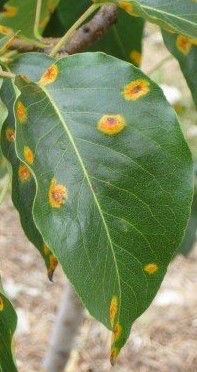

In [22]:
Image.open('/home/jpawick/Medienverarbeitung/done/apple_rust_leaf_done/Image_1013.jpg')

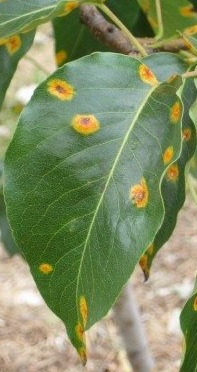

In [23]:
flip_horizontal('/home/jpawick/Medienverarbeitung/done/apple_rust_leaf_done/Image_1013.jpg', '')

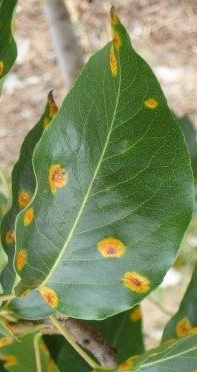

In [24]:
flip_vertical('/home/jpawick/Medienverarbeitung/done/apple_rust_leaf_done/Image_1013.jpg', '')

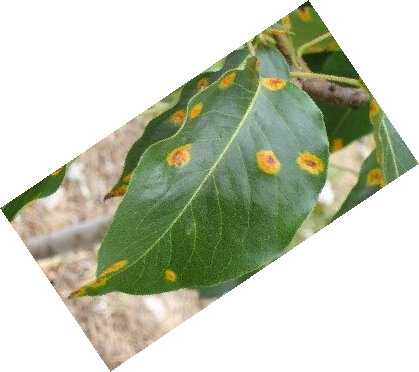

In [25]:
rotate_img('/home/jpawick/Medienverarbeitung/done/apple_rust_leaf_done/Image_1013.jpg', '')